<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [79]:
## Import all the tools needed
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
#
import pandas as pd
import numpy as np
#
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
#
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [85]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-23 00:32:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2020-05-23 00:32:58 (1.07 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [86]:
#reset data
df = pd.read_csv('loan_train.csv')
df.head()
df
df_rdc = df
df_rdc

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [93]:
df_rdc.replace({'loan_status': {'PAIDOFF': 'onhold', 'COLLECTION': 'FY'}}, inplace=True)
#df_FYonhold = df.replace({'education': {'High School or Below': 'MSCOE', 'Bechalor': 'AVIATION','college':'STIC'}},inplace=True)
df_rdc.replace({'education': {'High School or Below': 'MSCOE', 'Bechalor': 'AVIATION','college':'STIC', 'Master or Above':'Surface'}},inplace=True)

## Terms is 1 or 2 year execution
df_rdc.replace({'terms': {15: 24, 30: 12}},inplace=True)
# age is average score

#
#df_rdc.replace(('education':'Branch'), inplace=True)
df_rdc.replace({'Gender': {'male': 'RDC', 'female': 'ACQ'}},inplace=True)
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
#df['city-L/100km'] = 235/df["city-mpg"]
df_rdc.age.max()
df_rdc.age.min()
print ("Min score",df_rdc.age.min())
print ("Max Score", df_rdc.age.max())
df_rdc

Min score 18
Max Score 51


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,onhold,1000,12,9/8/2016,10/7/2016,45,MSCOE,RDC
1,2,2,onhold,1000,12,9/8/2016,10/7/2016,33,AVIATION,ACQ
2,3,3,onhold,1000,24,9/8/2016,9/22/2016,27,STIC,RDC
3,4,4,onhold,1000,12,9/9/2016,10/8/2016,28,STIC,ACQ
4,6,6,onhold,1000,12,9/9/2016,10/8/2016,29,STIC,RDC
...,...,...,...,...,...,...,...,...,...,...
341,394,394,FY,800,24,9/11/2016,9/25/2016,32,MSCOE,RDC
342,395,395,FY,1000,12,9/11/2016,10/10/2016,25,MSCOE,RDC
343,397,397,FY,800,24,9/12/2016,9/26/2016,39,STIC,RDC
344,398,398,FY,1000,12,9/12/2016,11/10/2016,28,STIC,RDC


Minimum and maximum score from Portfolio review

In [94]:
df
df_rdc
# need to look at car data customer segmentation for replace colum and value
#df_rdc['Principal'] = df_rdc['Principal/3.8']

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,onhold,1000,12,9/8/2016,10/7/2016,45,MSCOE,RDC
1,2,2,onhold,1000,12,9/8/2016,10/7/2016,33,AVIATION,ACQ
2,3,3,onhold,1000,24,9/8/2016,9/22/2016,27,STIC,RDC
3,4,4,onhold,1000,12,9/9/2016,10/8/2016,28,STIC,ACQ
4,6,6,onhold,1000,12,9/9/2016,10/8/2016,29,STIC,RDC
...,...,...,...,...,...,...,...,...,...,...
341,394,394,FY,800,24,9/11/2016,9/25/2016,32,MSCOE,RDC
342,395,395,FY,1000,12,9/11/2016,10/10/2016,25,MSCOE,RDC
343,397,397,FY,800,24,9/12/2016,9/26/2016,39,STIC,RDC
344,398,398,FY,1000,12,9/12/2016,11/10/2016,28,STIC,RDC


### Convert to date time object 

In [95]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()
df_rdc['due_date'] = pd.to_datetime(df_rdc['due_date'])
df_rdc['effective_date'] = pd.to_datetime(df_rdc['effective_date'])
df_rdc 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,onhold,1000,12,2016-09-08,2016-10-07,45,MSCOE,RDC
1,2,2,onhold,1000,12,2016-09-08,2016-10-07,33,AVIATION,ACQ
2,3,3,onhold,1000,24,2016-09-08,2016-09-22,27,STIC,RDC
3,4,4,onhold,1000,12,2016-09-09,2016-10-08,28,STIC,ACQ
4,6,6,onhold,1000,12,2016-09-09,2016-10-08,29,STIC,RDC
...,...,...,...,...,...,...,...,...,...,...
341,394,394,FY,800,24,2016-09-11,2016-09-25,32,MSCOE,RDC
342,395,395,FY,1000,12,2016-09-11,2016-10-10,25,MSCOE,RDC
343,397,397,FY,800,24,2016-09-12,2016-09-26,39,STIC,RDC
344,398,398,FY,1000,12,2016-09-12,2016-11-10,28,STIC,RDC


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [96]:
## Let's convert the original to RDC relevant
df_rdc['loan_status'].value_counts()
df['loan_status'].value_counts()
df['Gender'].value_counts()
#df_rdc.replace(columns={'dayofweek':'Month','loan_status':'Status'}, inplace=True)
#df_rdc = df_rdc.replace({'Gender': {'male': 'RDC', 'female': 'ACQ'}}, inplace=True)
#df_rdc = df_rdc.replace({'education': {'High School or Below': 'MSCOE', 'Bechalor': 'AVIATION','college':'STIC'}},inplace=True)
df_rdc['loan_status'].value_counts()

onhold    260
FY         86
Name: loan_status, dtype: int64

260 Project Onhold on time while 86 To Be Executed 


Lets plot some columns to underestand data better:

In [123]:
# notice: installing seaborn might takes a few minutes ###
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



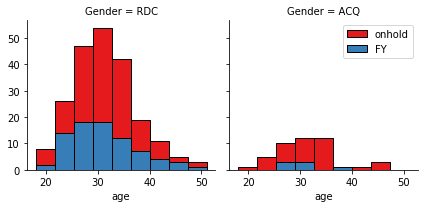

In [97]:
import seaborn as sns

#bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 10)
#g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
# show relation to score 18 - 51
bins = np.linspace(df_rdc.age.min(), df_rdc.age.max(), 10)
g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

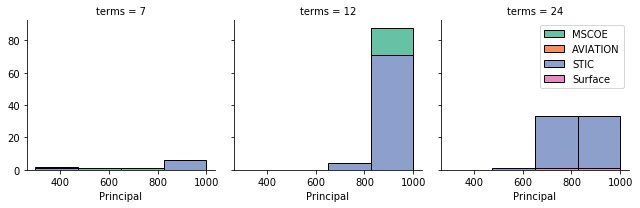

In [120]:
bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 5)
g = sns.FacetGrid(df_rdc, col="terms", hue="education", palette="Set2", col_wrap=3)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

df_rdc['dayofweek'] = df_rdc['effective_date'].dt.dayofweek
bins = np.linspace(df_rdc.dayofweek.min(), df_rdc.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

## Convert Categorical features to numerical values

Lets look at gender:

In [109]:
df_rdc.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#male/rfeamle translate to RDC and ACQ
df_rdc.groupby(['Principal'])['education'].value_counts(normalize=True)
#df_rdc

Principal  education
300        MSCOE        0.666667
           STIC         0.333333
500        MSCOE        0.500000
           STIC         0.500000
800        STIC         0.456790
           MSCOE        0.395062
           AVIATION     0.135802
           Surface      0.012346
900        STIC         1.000000
1000       MSCOE        0.449612
           STIC         0.418605
           AVIATION     0.127907
           Surface      0.003876
Name: education, dtype: float64

For Principal/Cost amounts (x100) EX $80K 45% are STIC, 39% MSCOE, 13% Aviation, 1.2% Surface



Lets convert male to 0 and female to 1:


In [141]:
#df_rdc['Gender'].replace(to_replace=['RDC','ACQ'], value=[0,1],inplace=True)
#df_rdc.head()
#df_rdc['Gender']
df_rdc['education'].replace(to_replace=['MSCOE','STIC','AVIATION','Surface'], value=[0,1,2,3],inplace=True)
df_rdc

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,onhold,1000,12,2016-09-08,2016-10-07,45,0,0
1,2,2,onhold,1000,12,2016-09-08,2016-10-07,33,2,1
2,3,3,onhold,1000,24,2016-09-08,2016-09-22,27,1,0
3,4,4,onhold,1000,12,2016-09-09,2016-10-08,28,1,1
4,6,6,onhold,1000,12,2016-09-09,2016-10-08,29,1,0
...,...,...,...,...,...,...,...,...,...,...
341,394,394,FY,800,24,2016-09-11,2016-09-25,32,0,0
342,395,395,FY,1000,12,2016-09-11,2016-10-10,25,0,0
343,397,397,FY,800,24,2016-09-12,2016-09-26,39,1,0
344,398,398,FY,1000,12,2016-09-12,2016-11-10,28,1,0


## One Hot Encoding  
#### How about Branches?
Of those categorized as Aviation, 25% executed
Of those categorized as MSCOE 25% executed
Of those categorized as STIC 23% executed

In [111]:
#df.groupby(['education'])['loan_status'].value_counts(normalize=True)
df_rdc.groupby(['education'])['loan_status'].value_counts(normalize=True)
df_rdc.groupby(['education'])['terms'].value_counts(normalize=True)

education  terms
AVIATION   24       0.500000
           12       0.454545
           7        0.045455
MSCOE      12       0.589404
           24       0.377483
           7        0.033113
STIC       12       0.503356
           24       0.449664
           7        0.046980
Surface    24       1.000000
Name: terms, dtype: float64

Term in years of population for branches.
I.E. 50% of STIC work is 12 months and all of Surface projects are 24 months

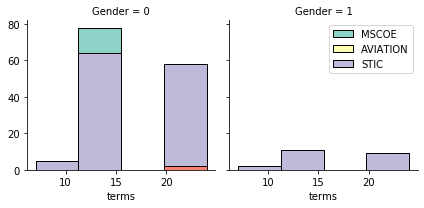

In [115]:
bins = np.linspace(df_rdc.terms.min(), df_rdc.terms.max(), 5)
g = sns.FacetGrid(df_rdc, col="Gender", hue="education", palette="Set3", col_wrap=2)
g.map(plt.hist, 'terms', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Feature befor One Hot Encoding

In [121]:
df[['Principal','terms','age','Gender','education']].head()
df_rdc[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,12,45,0,MSCOE
1,1000,12,33,1,AVIATION
2,1000,24,27,0,STIC
3,1000,12,28,1,STIC
4,1000,12,29,0,STIC


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [161]:
Feature = df_rdc[['Principal','terms','age','education']]
Feature = pd.concat([Feature,pd.get_dummies(df_rdc['age'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head(20)

,Principal,terms,age,education,18,19,20,21,22,23,...,40,41,42,43,44,45,46,47,50,51
0,1000,12,45,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1000,12,33,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,24,27,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,12,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,12,29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1000,12,36,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1000,12,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,800,24,26,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,300,7,29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1000,24,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature selection

Lets define feature sets, X:

In [162]:
X = Feature
#X[0:5]
X

,Principal,terms,age,education,18,19,20,21,22,23,...,40,41,42,43,44,45,46,47,50,51
0,1000,12,45,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1000,12,33,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,24,27,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,12,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,12,29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,800,24,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,1000,12,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343,800,24,39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344,1000,12,28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What are our lables?

In [163]:
#y = df['loan_status'].values
#y[0:5]
y= df_rdc['terms'].values
y
#df_rdc

array([12, 12, 24, 12, 12, 12, 12, 24,  7, 24, 12,  7,  7, 24, 12, 24, 12,
       12, 12, 12, 24, 12, 24, 24, 12, 12, 24, 12, 12, 12, 24, 12, 12, 24,
       24,  7, 24, 24,  7, 12, 12, 24, 12, 24, 12, 12, 24, 12, 12, 24, 24,
       12, 12, 12, 24, 12, 12, 12, 24, 24, 12, 24, 24, 12, 12, 12, 12,  7,
       24, 24, 12, 12, 24, 24, 24, 24, 12, 12, 12, 12, 12, 24, 12, 24, 24,
       12, 12, 12,  7, 24, 12, 12, 12, 12, 24, 12, 12, 12, 24, 12, 12, 24,
       24, 12, 12, 24, 24, 24, 12, 24, 24, 12, 12, 24, 12, 24, 24, 24, 12,
       12, 24, 24, 12, 24, 12, 24, 24, 24, 24, 24, 12, 12, 24, 24, 12, 24,
       24, 12, 24, 24, 12, 12, 24, 24, 12, 24, 12, 24, 24, 12, 12, 12, 24,
        7, 12, 24, 12, 12, 24, 24, 24, 12, 12, 24, 12, 24, 12, 24, 12, 24,
       12, 24, 12,  7, 12, 12,  7, 12, 24, 12, 12, 12, 12, 12, 24, 24, 24,
       12, 24, 12, 24, 12, 12, 24, 24, 24, 24, 24,  7, 12, 12, 24, 12, 24,
       24, 12, 24, 24, 24,  7, 12, 24, 24, 12, 24, 24,  7, 12, 12, 24, 24,
        7, 12, 24, 24, 12

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [164]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458, -0.79676004,  2.33152555, -0.99512471, -0.05383819,
        -0.07624929, -0.09352195, -0.12108987, -0.14369749, -0.15384615,
        -0.20535013, -0.22019275, -0.30246099, -0.27907279, -0.27300945,
        -0.29092868, -0.29092868, -0.24104766, -0.20535013, -0.22731417,
        -0.2476887 , -0.2476887 , -0.16342041, -0.18120657, -0.16342041,
        -0.15384615, -0.15384615, -0.07624929, -0.09352195, -0.09352195,
        -0.10814761,  9.246621  , -0.07624929, -0.05383819, -0.09352195,
        -0.05383819],
       [ 0.51578458, -0.79676004,  0.34170148,  1.83872837, -0.05383819,
        -0.07624929, -0.09352195, -0.12108987, -0.14369749, -0.15384615,
        -0.20535013, -0.22019275, -0.30246099, -0.27907279, -0.27300945,
        -0.29092868, -0.29092868, -0.24104766, -0.20535013,  4.39919779,
        -0.2476887 , -0.2476887 , -0.16342041, -0.18120657, -0.16342041,
        -0.15384615, -0.15384615, -0.07624929, -0.09352195, -0.09352195,
        -0.10814761, -0.10814

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [166]:
#USE THIS - figure out how to use given data to split train/test
# from lab example
# IMPORT KNN
#from sklearn.neighbors import KNeighborsClassifier
# Generate confusion matrix
#-------------------------------------------------------------------Examples above
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for k in range(1,10):    
#Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
# let's see the array
    yhat
#mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)

std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
std_acc
#
# From Example ---- begin

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
cm
#from example --------- end
#from labs begin -----
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
std_acc
#from lab END ----

## Take these for final table jaccard_similarity_score(y_test, yhat)
### Assign fr final table
#KNNy_test = y_test
#KNNyhat = yhat
#For LogRegression F1 Score' use variable (y_test, yhat, average='weighted'))
#Jaccard from LAB exercise classifiers
#FOr Logregression Jaccard score:',jaccard_similarity_score(y_test, yhat))
#For 'LogRegression Log Loss Score:',log_loss(y_test, yhat_prob))
#for SVM model take yhat, y_test
#print("Avg (linear kernel) F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))
#
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
KNN_jaccard = jaccard_similarity_score(y_test,yhat)
#help (jaccard_similarity_score)
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)

Train set: (242, 36) (242,)
Test set: (104, 36) (104,)
KNN Jaccard score:  0.9230769230769231
KNN F1 score: 0.9095744269794902


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


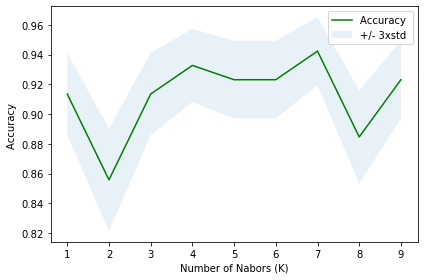

This graph shows best accuracy was with 0.9423076923076923 with k= 7


In [167]:

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "This graph shows best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

# Decision Tree

In [171]:
import numpy as np 
import pandas as pd
# New classifier Decision Tree
#
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree.fit(X_train,y_train)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

Train set: (242, 36) (242,)
Test set: (104, 36) (104,)


decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree # it shows the default parameters
decisionTree.fit(X_train,y_train)
#
predTree = decisionTree.predict(X_test)
#
from sklearn import metrics
import matplotlib.pyplot as plt
#print("DecisionTree Accuracy Jaccard Score: ", metrics.accuracy_score(y_test, predTree))
# From example --- Begin
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predTree)
cm
#from example END
#
#let's see it
print (predTree [0:5])
print (y_test [0:5])
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
#Summarizing so far
#help (jaccard_similarity_score)
## KNN Results 
print ("---------Summarizing results so far ------:")
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)
#
## For Decision Tree ----------------------------------
DECTree_jaccard = jaccard_similarity_score(y_test,predTree)
#help (jaccard_similarity_score)
print ("    DECTree Jaccard score: ",DECTree_jaccard)
#help (f1_score)
DECTree_F1Score = f1_score(y_test,predTree, average ='weighted')
print ("    DECTree F1 score:", DECTree_F1Score)


KNN with Jaccard provides best results and Decision Tree Jaccard performed even better than KNN

# Support Vector Machine

In [173]:
# EXAMPLE graph from SVM lab
# instructional note ------
#The SVM algorithm offers a choice of kernel functions for 
#performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. 
#The mathematical function used for the transformation is known as the kernel function, 
#and can be of different types, such as:

#1.Linear
#2.Polynomial
#3.Radial basis function (RBF)
#4.Sigmoid

#Each of these functions has its characteristics, its pros and cons, and its equation, 
#but as there's no easy way of knowing which function performs best with any given dataset, 
#we usually choose different functions in turn and compare the results. 
#Let's just use the default, RBF (Radial Basis Function) 

#ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
#cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
#plt.show()
#feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#X = np.asarray(feature_df)
#X[0:5]
# from svm train-test split as above
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


Train set: (276, 36) (276,)
Test set: (70, 36) (70,)


In [174]:
from sklearn import svm
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
###from example 
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
SVM_yhat = SVM_model.predict(X_test)

#SVM_yhat = SVM_model.predict(test_X)
#print("SVM Jaccard index: %.2f" % jaccard_similarity_score(test_y, SVM_yhat))
#print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

#
#SVM_yhat = SVMrbf.predict(X_test)
#print( "svm_yhat",SVM_yhat)
#SVM_F1Score = f1_score(y_test,SVM_yhat)
#SVM_Jaccard = jaccard_similarity_score(y_test,SVM_yhat)
#let's see it
#import itertools
# from example ----
#SVM_yhat = SVM_model.predict(test_X)
#print("SVM Jaccard index: %.2f" % jaccard_similarity_score(test_y, SVM_yhat))
#print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

#help (jaccard_similarity_score)
## Summarizing so far
## --------------------For KNN --------------------
print ("---------Summarizing results so far ------:")
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)
#
## --------------------For Decision Tree ----------------------------------
#DECTree_jaccard = jaccard_similarity_score(y_test,predTree)
#help (jaccard_similarity_score)
print ("    DECTree Jaccard score: ",DECTree_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#DECTree_F1Score = f1_score(y_test,predTree, average ='weighted')
print ("    DECTree F1 score:", DECTree_F1Score)
## ---------------------For SVM  ----------------------------------
SVM_Jaccard = jaccard_similarity_score(y_test,SVM_yhat)
#help (jaccard_similarity_score)
print ("SVM Jaccard score: ",SVM_Jaccard)
#help (f1_score)
SVM_F1Score = f1_score(y_test,SVM_yhat, average ='weighted')
print ("SVM F1 score:", SVM_F1Score)


Train set: (276, 36) (276,)
Test set: (70, 36) (70,)
---------Summarizing results so far ------:
KNN Jaccard score:  0.9230769230769231
KNN F1 score: 0.5546638400969109
    DECTree Jaccard score:  1.0
    DECTree F1 score: 1.0
SVM Jaccard score:  0.8571428571428571
SVM F1 score: 0.819536984754376


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#
### Try linear instead of RBC

clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))
lf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
#print("Avg (linear kernel) F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))
print("Avg (rbf kernel) F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))


# Logistic Regression

In [175]:
# Start Logistic Regression - change parameters so error/cost  decreases with derivative
#The version of Logistic Regression in Scikit-learn, support regularization. 
#Regularization is a technique used to solve the overfitting problem in machine learning models. 
#C parameter indicates inverse of regularization 
#strength which must be a positive float. 
#Smaller values specify stronger regularization. Now lets fit our model with train set:
#
# Using same Train and Test sets as above
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
# predict test set
#predict_proba returns estimates for all classes, ordered by the label of classes. 
#So, the first column is the probability of class 1, P(Y=1|X), 
#and second column is probability of class 0, P(Y=0|X):

yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
#
#from sklearn.metrics import f1_score
#print ('LogRegression F1 Score',f1_score(y_test, yhat, average='weighted'))
#Jaccard from LAB exercise classifiers
#from sklearn.metrics import jaccard_similarity_score
#print ('Logregression Jaccard score:',jaccard_similarity_score(y_test, yhat))

#from sklearn.metrics import log_loss
#print('LogRegression Log Loss Score:',log_loss(y_test, yhat_prob))
## Summarizing so far
## --------------------For KNN --------------------
print ("---------Summarizing results so far ------:")
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)
#
## --------------------For Decision Tree ----------------------------------
#DECTree_jaccard = jaccard_similarity_score(y_test,predTree)
#help (jaccard_similarity_score)
print ("    DECTree Jaccard score: ",DECTree_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#DECTree_F1Score = f1_score(y_test,predTree, average ='weighted')
print ("    DECTree F1 score:", DECTree_F1Score)
## ---------------------For SVM  ---------------------------***** not correct yet-------
#print ("\n SVM - errors on input type ?--checking\n")
SVM_Jaccard = jaccard_similarity_score(y_test,SVM_yhat)
#help (jaccard_similarity_score)
print ("SVM Jaccard score: ",SVM_Jaccard)
#help (f1_score)
SVM_F1Score = f1_score(y_test,SVM_yhat, average ='weighted')
print ("SVM F1 score:", SVM_F1Score)
#
## --------------------For Logistic Regression ----------------------------------
LOGReg_jaccard = jaccard_similarity_score(y_test,yhat)
#help (jaccard_similarity_score)
print ("   LOGReg Jaccard score: ",LOGReg_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
LOGReg_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("   LOGReg F1 score:", LOGReg_F1Score)
print(" LOGReg Log Loss Score: ",log_loss(y_test, yhat_prob))


---------Summarizing results so far ------:
KNN Jaccard score:  0.9230769230769231
KNN F1 score: 0.5546638400969109
    DECTree Jaccard score:  1.0
    DECTree F1 score: 1.0
SVM Jaccard score:  0.8571428571428571
SVM F1 score: 0.819536984754376
   LOGReg Jaccard score:  0.9142857142857143
   LOGReg F1 score: 0.8744186046511628
 LOGReg Log Loss Score:  0.7060092294641318


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model Evaluation using Test set

In [176]:

#Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the 
#intersection divided by the size of the union of two label sets. If the entire set of predicted 
#labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.
# F1score from confusion matrix -averages scores
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [188]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-22 22:15:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-05-22 22:15:20 (8.74 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [189]:
#test_df = pd.read_csv('loan_test.csv')
#test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [177]:
#Jaccard from LAB exercise classifiers
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9142857142857143

#f1_score -work on this one - from LAB exercise classifiers
#from sklearn.metrics import classification_report, confusion_matrix
#import itertools
#def plot_confusion_matrix(cm, classes,
#                          normalize=False,
#                          title='Confusion matrix',
#                          cmap=plt.cm.Blues):
#    """
#    This function prints and plots the confusion matrix.
 #   Normalization can be applied by setting `normalize=True`.
#    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
#
# Compute confusion matrix -PaidoFF and Collection
#
#cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
# F1 score reported here based om CM calculations and average for each label
#print (classification_report(y_test, yhat))

In [191]:
## --------------------For KNN --------------------
print ("---------Summarizing results so far ------:")
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)
print("\n")
#
## --------------------For Decision Tree ----------------------------------
#DECTree_jaccard = jaccard_similarity_score(y_test,predTree)
#help (jaccard_similarity_score)
#print ("    DECTree Jaccard score: ",DECTree_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#DECTree_F1Score = f1_score(y_test,predTree, average ='weighted')
#print ("    DECTree F1 score:", DECTree_F1Score)
## ---------------------For SVM  ---------------------------***** not correct yet-------
#print ("\n SVM - errors on input type ?--checking\n")
#
SVM_Jaccard = jaccard_similarity_score(y_test,SVM_yhat)
#help (jaccard_similarity_score)
#
print ("SVM Jaccard score: ",SVM_Jaccard)
#help (f1_score)
#
SVM_F1Score = f1_score(y_test,SVM_yhat, average ='weighted')
print ("SVM F1 score:", SVM_F1Score)
print("\n")
## --------------------For Logistic Regression ----------------------------------
LOGReg_jaccard = jaccard_similarity_score(y_test,yhat)
#help (jaccard_similarity_score)
print ("LOGReg Jaccard score: ",LOGReg_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
LOGReg_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("LOGReg F1 score:", LOGReg_F1Score)
print("LOGReg Log Loss Score: ",log_loss(y_test, yhat_prob))
#
#SumClassifier = np.array(["KNN","Decision Tree","SVM","LogReg"])
SumClassifier = np.array(["KNN","SVM","LogReg"])
#SumJaccard = np.array([KNN_jaccard,DECTree_jaccard,SVM_Jaccard,LOGReg_jaccard])
#SumF1Score = np.array([KNN_F1Score, DECTree_F1Score,SVM_F1Score,LOGReg_F1Score])
#SumLogLoss = np.array(["NA","NA","NA",log_loss(y_test,yhat_prob)])
#
SumJaccard = np.array([KNN_jaccard,SVM_Jaccard,LOGReg_jaccard])
SumF1Score = np.array([KNN_F1Score,SVM_F1Score,LOGReg_F1Score])
SumLogLoss = np.array(["NA","NA",log_loss(y_test,yhat_prob)])

#Now report array results in dataframe format
df_summary = pd.DataFrame(list(zip(SumClassifier,SumJaccard,SumF1Score,SumLogLoss)),
                          columns=["Classifier","Jaccard","F1","LogLoss"])
df_summary


---------Summarizing results so far ------:
KNN Jaccard score:  0.9230769230769231
KNN F1 score: 0.5546638400969109


SVM Jaccard score:  0.8571428571428571
SVM F1 score: 0.819536984754376


LOGReg Jaccard score:  0.9142857142857143
LOGReg F1 score: 0.8744186046511628
LOGReg Log Loss Score:  0.7060092294641318


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Classifier,Jaccard,F1,LogLoss
0,KNN,0.923077,0.554664,NA
1,SVM,0.857143,0.819537,NA
2,LogReg,0.914286,0.874419,0.7060092294641318


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>